In [1]:
install.packages("tidyverse") #installed to parse through the df neatly
install.packages(c("gt", "webshot2"))  #installed to make tables to then export
install.packages("car") # to calc VIF
install.packages("MASS") # fitting glm.nb
install.packages("ggeffects") # ggpredict 
install.packages("glmmTMB")
install.packages("broom.mixed") #for glmm 
install.packages("performance") # for pseudo r^2 (compatable with RE)


trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-x86_64/contrib/4.5/tidyverse_2.0.0.tgz'
Content type 'application/x-gzip' length 428817 bytes (418 KB)
downloaded 418 KB




The downloaded binary packages are in
	/var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//RtmpjprON8/downloaded_packages


trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-x86_64/contrib/4.5/gt_1.1.0.tgz'
trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-x86_64/contrib/4.5/webshot2_0.1.2.tgz'



The downloaded binary packages are in
	/var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//RtmpjprON8/downloaded_packages


trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-x86_64/contrib/4.5/car_3.1-3.tgz'
Content type 'application/x-gzip' length 1541957 bytes (1.5 MB)
downloaded 1.5 MB




The downloaded binary packages are in
	/var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//RtmpjprON8/downloaded_packages


trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-x86_64/contrib/4.5/MASS_7.3-65.tgz'
Content type 'application/x-gzip' length 1171064 bytes (1.1 MB)
downloaded 1.1 MB




The downloaded binary packages are in
	/var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//RtmpjprON8/downloaded_packages


trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-x86_64/contrib/4.5/ggeffects_2.3.1.tgz'
Content type 'application/x-gzip' length 854996 bytes (834 KB)
downloaded 834 KB




The downloaded binary packages are in
	/var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//RtmpjprON8/downloaded_packages


trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-x86_64/contrib/4.5/glmmTMB_1.1.13.tgz'
Content type 'application/x-gzip' length 19206159 bytes (18.3 MB)
downloaded 18.3 MB




The downloaded binary packages are in
	/var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//RtmpjprON8/downloaded_packages


trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-x86_64/contrib/4.5/broom.mixed_0.2.9.6.tgz'
Content type 'application/x-gzip' length 5321058 bytes (5.1 MB)
downloaded 5.1 MB




The downloaded binary packages are in
	/var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//RtmpjprON8/downloaded_packages


trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-x86_64/contrib/4.5/performance_0.15.3.tgz'
Content type 'application/x-gzip' length 3242436 bytes (3.1 MB)
downloaded 3.1 MB




The downloaded binary packages are in
	/var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//RtmpjprON8/downloaded_packages


In [ ]:
library(ggplot2) #load in ggplot2 library for plotting
library(tibble) #load in to convert df to tibbles for tidyverse compatability
library(dplyr) #load in to neatly group data by column in the tibble
library(broom) #load in the convert linear model output into df
library(gt) #loaded in to create tables
library(car) # VIF
library(MASS) #glm.nb
library(ggeffects) #used in partial effects
library(glmmTMB)
library(broom.mixed)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



Warning message:
In check_dep_version(dep_pkg = "TMB") : package version mismatch: 
glmmTMB was built with TMB package version 1.9.17
Current TMB package version is 1.9.18
Please re-install glmmTMB from source or restore original ‘TMB’ package (see '?reinstalling' for more information)


In [3]:
# saving data
dat = read.csv("/Users/emmabolech/Desktop/BIOS15/Midterm/exam2023_data-2.csv")

metadat = read.csv("/Users/emmabolech/Desktop/BIOS15/Midterm/exam2023_metadata-2.csv")

In [4]:
str(dat)
head(dat, n = 15)
summary(dat)

'data.frame':	351 obs. of  38 variables:
 $ SurveyID                      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date                          : chr  "24/07/2006" "24/07/2006" "24/07/2006" "24/07/2006" ...
 $ Season                        : chr  "Winter 2006" "Winter 2006" "Winter 2006" "Winter 2006" ...
 $ Property                      : chr  "Barlow" "Barlow" "Barlow" "Barlow" ...
 $ Quadrat.no                    : int  1 2 3 4 5 6 1 2 3 4 ...
 $ Easting                       : int  310042 310087 310240 309998 309958 310137 386643 386736 386732 386633 ...
 $ Northing                      : int  5934571 5934567 5934699 5934968 5934752 5934765 5936462 5936384 5936315 5936324 ...
 $ Aspect                        : chr  "nne" "ne" "se" "0" ...
 $ Landscape.position            : chr  "slope" "slope" "slope" "flat" ...
 $ ExoticAnnualGrass_cover       : num  5.7 6.7 2.3 5 5.7 4.3 1.7 3 1.7 1.7 ...
 $ ExoticAnnualHerb_cover        : num  0.3 3.6 0 1.3 4.7 4 5 9.6 10 28 ...
 $ ExoticPerennialHer

    SurveyID         Date              Season            Property           Quadrat.no        Easting          Northing      
 Min.   :  1.0   Length:351         Length:351         Length:351         Min.   : 1.000   Min.   :309958   Min.   :5821489  
 1st Qu.: 88.5   Class :character   Class :character   Class :character   1st Qu.: 2.000   1st Qu.:358791   1st Qu.:5897726  
 Median :176.0   Mode  :character   Mode  :character   Mode  :character   Median : 4.000   Median :381282   Median :5939665  
 Mean   :176.0                                                            Mean   : 4.068   Mean   :374341   Mean   :5934936  
 3rd Qu.:263.5                                                            3rd Qu.: 6.000   3rd Qu.:388156   3rd Qu.:5957452  
 Max.   :351.0                                                            Max.   :11.000   Max.   :410683   Max.   :6010844  
                                                                                                                      

In [5]:
# taking away any entries with NA
dat_full = na.omit(dat)

In [6]:
# examining potential random effects candidates

# check if all survey IDs are unique
print(anyDuplicated(dat_full$SurveyID))
# prints zero so they are all unique (so no random effects)

# as a sanity check look at property
print(anyDuplicated(dat_full$Property))
# there are duplicates as expected --> random effects

# season
print(anyDuplicated(dat_full$Season))
# there are duplicates as expected --> random effects? or predictor

# date
print(anyDuplicated(dat_full$Date))
# there are duplicates as expected --> random effects? or exclude for too many entries

# check whether any dates are associated with multiple seasons
print(dat_full %>%
  group_by(Date) %>% # grouping the data by only the Date column
  summarise(n_seasons = n_distinct(Season)) %>% # creating a new sum table that counts the unique seasons for each date
  filter(n_seasons > 1)) # filter out any dates with only one season (keep any duplicate season data points)

# all dates belong to only one season so I can nest Date within Season if i choose to not use Season as a fixed effect

[1] 0
[1] 2
[1] 2
[1] 2
# A tibble: 0 × 2
# ℹ 2 variables: Date <chr>, n_seasons <int>


In [7]:
# changing random effects structure so that I can use it as a random effect later (to factors)
dat_full$Property = as.factor(dat_full$Property)

dat_full$Date = as.factor(dat_full$Date)

In [8]:
# setting up random effects structure (preliminary may change with fitting)

# (1|Property) + (1|Date) # quadrat nested within property

In [9]:
# standardizing all continuous predictor variables and preparing all categorical predictor variables

#categorical###############################################

dat_full$season = factor(dat_full$Season)

dat_full$aspect = factor(dat_full$Aspect)

dat_full$landscape_position = factor(dat_full$Landscape.position)

#coordinates###############################################

dat_full$easting_std = dat_full$Easting 

dat_full$northing_std = dat_full$Northing

#exotic species###############################################

dat_full$ExoticAnnualGrass_cover_std = scale(dat_full$ExoticAnnualGrass_cover)

dat_full$ExoticAnnualHerb_cover_std = scale(dat_full$ExoticAnnualHerb_cover)

dat_full$ExoticPerennialHerb_cover_std = scale(dat_full$ExoticPerennialHerb_cover)

dat_full$ExoticPerennialGrass_cover_std = scale(dat_full$ExoticPerennialGrass_cover)

dat_full$ExoticShrub_cover_std = scale(dat_full$ExoticShrub_cover)

#native species###############################################

dat_full$NativePerennialFern_cover_std = scale(dat_full$NativePerennialFern_cover)

dat_full$NativePerennialGrass_cover_std = scale(dat_full$NativePerennialGrass_cover)

dat_full$NativePerennialHerb_cover_std = scale(dat_full$NativePerennialHerb_cover)

dat_full$NativePerennialGraminoid_cover_std = scale(dat_full$NativePerennialGraminoid_cover)

dat_full$NativeShrub_cover_std = scale(dat_full$NativeShrub_cover)

#non-living cover###############################################

dat_full$BareGround_cover_std = scale(dat_full$BareGround_cover)

dat_full$Litter_cover_std = scale(dat_full$Litter_cover)

dat_full$MossLichen_cover_std = scale(dat_full$MossLichen_cover)

dat_full$Rock_cover_std = scale(dat_full$Rock_cover)

dat_full$Euc_canopy_cover_std = scale(dat_full$Euc_canopy_cover)

################################################

dat_full$Distance_to_Eucalypt_canopy_std = scale(dat_full$Distance_to_Eucalypt_canopy.m.)

#climate###############################################

dat_full$annual_precipitation_std = scale(dat_full$annual_precipitation)

dat_full$precipitation_warmest_quarter_std = scale(dat_full$precipitation_warmest_quarter)

dat_full$precipitation_coldest_quarter_std = scale(dat_full$precipitation_coldest_quarter)

dat_full$PET_std = scale(dat_full$PET)

dat_full$SRad_Jan_std = scale(dat_full$SRad_Jan)

dat_full$SRad_Jul_std = scale(dat_full$SRad_Jul)

#terrain###############################################

dat_full$MrVBF_std = scale(dat_full$MrVBF)

dat_full$K_perc_std = scale(dat_full$K_perc)

dat_full$Th_ppm_std = scale(dat_full$Th_ppm)

dat_full$U_ppm_std = scale(dat_full$U_ppm)




In [10]:
cat_predictors = c("season", "aspect", "landscape_position")

################################################

coord_predictors = c("easting_std", "northing_std")

exotic_predictors = c("ExoticAnnualGrass_cover_std", "ExoticAnnualHerb_cover_std", "ExoticPerennialHerb_cover_std", "ExoticPerennialGrass_cover_std", "ExoticShrub_cover_std")

native_predictors = c("NativePerennialFern_cover_std", "NativePerennialGrass_cover_std", "NativePerennialHerb_cover_std", "NativePerennialGraminoid_cover_std", "NativeShrub_cover_std")

ground_predictors = c("BareGround_cover_std", "Litter_cover_std", "MossLichen_cover_std", "Rock_cover_std", "Euc_canopy_cover_std")

Distance_to_Euc_predictor = c("Distance_to_Eucalypt_canopy_std")

climate_predictors = c("annual_precipitation_std", "precipitation_warmest_quarter_std", "precipitation_coldest_quarter_std", "PET_std","SRad_Jan_std", "SRad_Jul_std")

terrain_predictors = c("MrVBF_std", "K_perc_std", "Th_ppm_std", "U_ppm_std")


In [11]:
# setting up a preliminary cor() matrix for all cont predictors (this will be a bit off because many predictors will skew results and potentially hide correlations)

all_cont_predictors = c("easting_std", "northing_std", "ExoticAnnualGrass_cover_std", "ExoticAnnualHerb_cover_std", "ExoticPerennialHerb_cover_std", "ExoticPerennialGrass_cover_std", "ExoticShrub_cover_std", "NativePerennialFern_cover_std", "NativePerennialGrass_cover_std", "NativePerennialHerb_cover_std", "NativePerennialGraminoid_cover_std", "NativeShrub_cover_std","BareGround_cover_std", "Litter_cover_std", "MossLichen_cover_std", "Rock_cover_std", "Euc_canopy_cover_std","Distance_to_Eucalypt_canopy_std","annual_precipitation_std", "precipitation_warmest_quarter_std", "precipitation_coldest_quarter_std", "PET_std", "MrVBF_std", "K_perc_std", "Th_ppm_std", "U_ppm_std", "SRad_Jan_std", "SRad_Jul_std")

all_cont_predictors_df = dat_full[, all_cont_predictors, drop = FALSE]

all_cont_predictors_df = as.data.frame(  # changing all classes to numeric or keeping at integers (bc they were matrices --> this is so cor() will work )
  lapply(all_cont_predictors_df, function(predictor) {
    if (is.matrix(predictor) || is.array(predictor)) { # if matrix or array change to numeric
      as.numeric(predictor)
    } else {
      predictor
    }
  })
)


print(sapply(all_cont_predictors_df, class)) # make sure that works 

                       easting_std                       northing_std        ExoticAnnualGrass_cover_std 
                         "integer"                          "integer"                          "numeric" 
        ExoticAnnualHerb_cover_std      ExoticPerennialHerb_cover_std     ExoticPerennialGrass_cover_std 
                         "numeric"                          "numeric"                          "numeric" 
             ExoticShrub_cover_std      NativePerennialFern_cover_std     NativePerennialGrass_cover_std 
                         "numeric"                          "numeric"                          "numeric" 
     NativePerennialHerb_cover_std NativePerennialGraminoid_cover_std              NativeShrub_cover_std 
                         "numeric"                          "numeric"                          "numeric" 
              BareGround_cover_std                   Litter_cover_std               MossLichen_cover_std 
                         "numeric"            

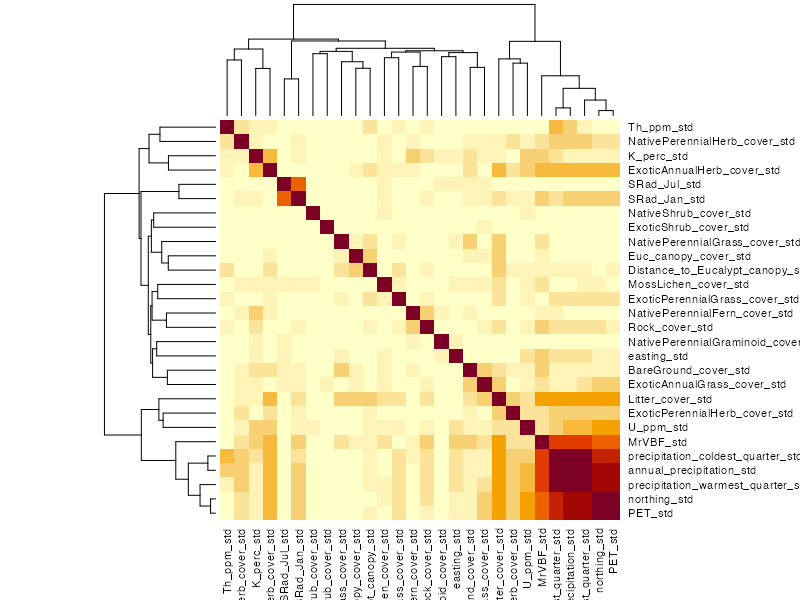

In [12]:
cor_matrix = cor(all_cont_predictors_df) # cor() matrix of all pairwise combos

heatmap(abs(cor_matrix), symm = TRUE) # heat map to display any higher correlations to get an idea

# you can see a large cluster of climate predictors 

# radiation predictors also seem to correlate 

In [13]:
# what is my response variable?

# response variable is the Euc seedling count I have decided to combine all sizes to simplicity 

# for count data I need to inspect for overdispersion, outliers, and for zeros

dat_full$seedling_count = rowSums(dat_full[, c("euc_sdlgs0_50cm", "euc_sdlgs50cm.2m", "euc_sdlgs.2m")])


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  19  20  21  22  23  28  88 
257  18  13  11   7   6   3   4   2   1   2   4   3   1   5   1   1   1   1   1   1   1   1   1 


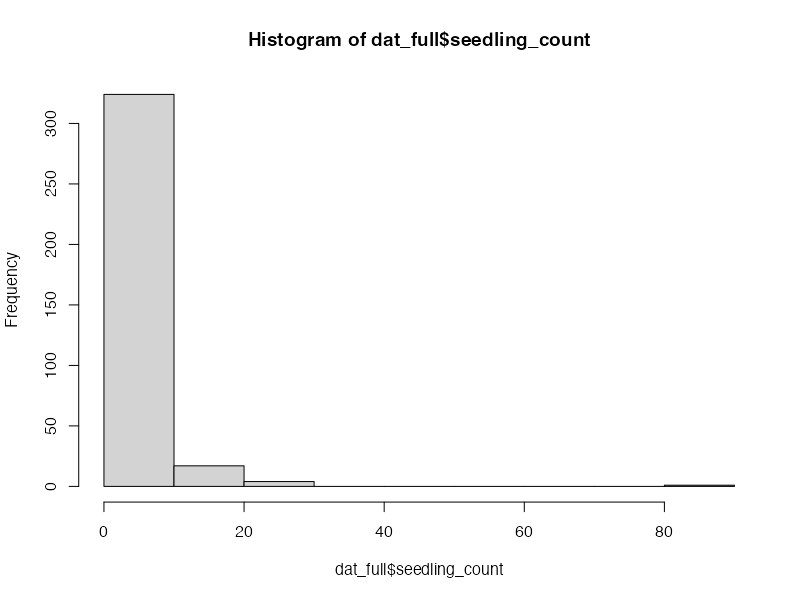

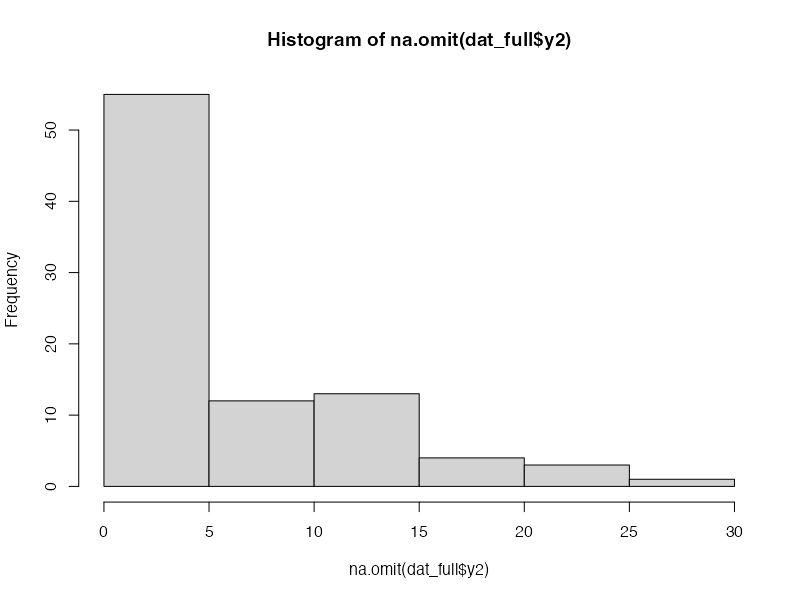

In [14]:
hist(dat_full$seedling_count) # histogram shows bias to left hand side 

print(table(dat_full$seedling_count)) 

# lots of zeros --> hurdel model? 

# outlier at 88 I will exclude this in modeling

# removing 88 count outlier 
dat_full = dat_full[dat_full$seedling_count < 50,]

# positive count data is also overdispersed --> when i handle the positive cont portion it must account for this
dat_full$y2 = dat_full$seedling_count
dat_full$y2[dat_full$y2 == 0] = NA
hist(na.omit(dat_full$y2))

In [ ]:
# my Q1 --> from climate and soil predictors (environment / ground) which predictors influence seedling establishment and / or expansion more?

climate_predictors = c("annual_precipitation_std", "precipitation_warmest_quarter_std", "precipitation_coldest_quarter_std", "PET_std","SRad_Jan_std", "SRad_Jul_std")

terrain_predictors = c("MrVBF_std", "K_perc_std", "Th_ppm_std", "U_ppm_std")

shade_predictors = c("Euc_canopy_cover_std")

# i know there will be a problem with correlation within the climate predictors so i must pay attention to this

In [16]:
# starting without the random effects --> but i will split into binomial and positive count hurdle models  --> auto removing SRad_Jan_std bc of the cor() heat map and redundancy

dat_full$y1 = ifelse(dat_full$seedling_count > 0,1,0)

env_m1 = glmmTMB(y1 ~ annual_precipitation_std + precipitation_warmest_quarter_std + precipitation_coldest_quarter_std + PET_std + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std,
  data = dat_full,
  family = binomial
)

env_m2 = glmmTMB(y1 ~ annual_precipitation_std + precipitation_warmest_quarter_std + precipitation_coldest_quarter_std + PET_std  + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std + (1 | Property),
  data = dat_full,
  family = binomial
)

env_m3 = glmmTMB(y1 ~ annual_precipitation_std + precipitation_warmest_quarter_std + precipitation_coldest_quarter_std + PET_std  + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std + (1 | Date),
  data = dat_full,
  family = binomial
)

env_m4 = glmmTMB(y1 ~ annual_precipitation_std + precipitation_warmest_quarter_std + precipitation_coldest_quarter_std + PET_std  + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std + (1| Property) + (1 | Date),
  data = dat_full,
  family = binomial
)



print(AIC(env_m1, env_m2, env_m3, env_m4))

print(VarCorr(env_m4))


# either property only or both BUT based on variance from both --> keep both


       df      AIC
env_m1 11 376.3390
env_m2 12 353.4822
env_m3 12 373.7916
env_m4 13 354.9213

Conditional model:
 Groups   Name        Std.Dev.
 Property (Intercept) 1.50119 
 Date     (Intercept) 0.38077 


In [17]:
fixed_only = glm(y1 ~ annual_precipitation_std + precipitation_warmest_quarter_std + precipitation_coldest_quarter_std + PET_std  + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std,
  family = binomial,
  data = dat_full
)

print(vif(fixed_only))

# taking away prep variables and PET while keeping RE the same

env_fixed_m1 = glmmTMB(y1 ~ annual_precipitation_std + precipitation_coldest_quarter_std + PET_std  + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std + (1| Property) + (1 | Date),
  data = dat_full,
  family = binomial
)

env_fixed_m2 = glmmTMB(y1 ~ annual_precipitation_std + PET_std  + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std + (1| Property) + (1 | Date),
  data = dat_full,
  family = binomial
)

env_fixed_m3 = glmmTMB(y1 ~ annual_precipitation_std  + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std + (1| Property) + (1 | Date),
  data = dat_full,
  family = binomial
)

print(AIC(env_fixed_m1, env_fixed_m2, env_fixed_m3))


         annual_precipitation_std precipitation_warmest_quarter_std precipitation_coldest_quarter_std 
                      1103.911659                        193.209822                        442.296181 
                          PET_std                      SRad_Jul_std                         MrVBF_std 
                         9.866074                          1.114736                          2.910657 
                       K_perc_std                        Th_ppm_std                         U_ppm_std 
                         1.221400                          2.072207                          1.656381 
             Euc_canopy_cover_std 
                         1.022063 
             df      AIC
env_fixed_m1 12 353.1311
env_fixed_m2 11 351.2576
env_fixed_m3 10 349.7562


In [18]:
# PCA on precip predictors

precip_subset = dat_full[, c("annual_precipitation_std","precipitation_coldest_quarter_std", "precipitation_warmest_quarter_std","PET_std" )]

pca_val = prcomp(precip_subset)

print(summary(pca_val)) # i will just use PC1

dat_full$precip_PC1 = pca_val$x[,1]

Importance of components:
                          PC1     PC2     PC3     PC4
Standard deviation     1.9294 0.48650 0.19374 0.02846
Proportion of Variance 0.9312 0.05921 0.00939 0.00020
Cumulative Proportion  0.9312 0.99041 0.99980 1.00000


In [19]:
env_fixed_m4 = glmmTMB(y1 ~ precip_PC1  + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std + (1| Property) + (1 | Date),
  data = dat_full,
  family = binomial
)

print(AIC(env_fixed_m1, env_fixed_m2, env_fixed_m3, env_fixed_m4))

# checking vif with these fixed
fixed_final = glm(y1 ~ precip_PC1  + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std,
  family = binomial,
  data = dat_full
)

print(vif(fixed_final)) # looks ok


             df      AIC
env_fixed_m1 12 353.1311
env_fixed_m2 11 351.2576
env_fixed_m3 10 349.7562
env_fixed_m4 10 349.7462
          precip_PC1         SRad_Jul_std            MrVBF_std           K_perc_std           Th_ppm_std            U_ppm_std 
            2.610489             1.037855             2.222718             1.137410             1.124427             1.287101 
Euc_canopy_cover_std 
            1.014376 


In [20]:
# final binomial model 

env_bi_m = glmmTMB(y1 ~ precip_PC1  + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std + (1| Property) + (1 | Date),
  data = dat_full,
  family = binomial
)



In [21]:
# doing the same with the pos contin model but with chosen fixed effects from above

env_abun_m1 = glmmTMB(seedling_count ~ annual_precipitation_std + precipitation_warmest_quarter_std + precipitation_coldest_quarter_std + PET_std + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std,
  data = subset(dat_full, seedling_count > 0),
  family = nbinom1 # better for more zeros
)

env_abun_m2 = glmmTMB(seedling_count ~ annual_precipitation_std +precipitation_warmest_quarter_std + precipitation_coldest_quarter_std + PET_std + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std + (1| Property),
  data = subset(dat_full, seedling_count > 0),
  family = nbinom1 # better for more zeros
)

env_abun_m3 = glmmTMB(seedling_count ~ annual_precipitation_std + precipitation_warmest_quarter_std + precipitation_coldest_quarter_std + PET_std + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std + (1 | Date),
  data = subset(dat_full, seedling_count > 0),
  family = nbinom1 # better for more zeros
)

env_abun_m4 = glmmTMB(seedling_count ~ annual_precipitation_std + precipitation_warmest_quarter_std + precipitation_coldest_quarter_std + PET_std+ PET_std  + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std + (1| Property) + (1 | Date),
  data = subset(dat_full, seedling_count > 0),
  family = nbinom1 # better for more zeros
)


print(AIC(env_abun_m1, env_abun_m2, env_abun_m3, env_abun_m4))

print(VarCorr(env_abun_m4))

# random effects contribute almost zero var on the data so i will exclude them entirely


Warning message:
In finalizeTMB(TMBStruc, obj, fit, h, data.tmb.old) :
  Model convergence problem; singular convergence (7). See vignette('troubleshooting'), help('diagnose')


            df      AIC
env_abun_m1 12 515.7574
env_abun_m2 13 517.7574
env_abun_m3 13 517.7574
env_abun_m4 14 519.7574

Conditional model:
 Groups   Name        Std.Dev.  
 Property (Intercept) 3.6803e-05
 Date     (Intercept) 1.7892e-26


In [22]:
# checking vif as well for this model 

fixed_abun = glm.nb(seedling_count ~ annual_precipitation_std +precipitation_warmest_quarter_std + precipitation_coldest_quarter_std + PET_std + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std,
data = subset(dat_full, seedling_count > 0))

vif(fixed_abun) #  --> same problems here

ab_fixed_m1 = glmmTMB(seedling_count ~ annual_precipitation_std + precipitation_coldest_quarter_std + PET_std + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std,
data = subset(dat_full, seedling_count > 0),
family = nbinom1)

ab_fixed_m2 = glmmTMB(seedling_count ~ annual_precipitation_std  + PET_std + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std,
data = subset(dat_full, seedling_count > 0),
family = nbinom1)

ab_fixed_m3 = glmmTMB(seedling_count ~ annual_precipitation_std  + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std,
data = subset(dat_full, seedling_count > 0),
family = nbinom1)

AIC(ab_fixed_m1, ab_fixed_m2, ab_fixed_m3)

            df      AIC
ab_fixed_m1 11 514.3640
ab_fixed_m2 10 517.5111
ab_fixed_m3  9 515.9502

In [23]:
ab_fixed_m4 = glmmTMB(seedling_count ~ precip_PC1  + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std,
data = subset(dat_full, seedling_count > 0),
family = nbinom1)

AIC(ab_fixed_m1, ab_fixed_m2, ab_fixed_m3, ab_fixed_m4)

# vif check 

check = glm.nb(seedling_count ~ precip_PC1  + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std,
data = subset(dat_full, seedling_count > 0))

print(vif(check)) # looks better

          precip_PC1         SRad_Jul_std            MrVBF_std           K_perc_std           Th_ppm_std            U_ppm_std 
            2.921721             1.103665             2.546498             1.319758             1.170267             1.154474 
Euc_canopy_cover_std 
            1.313647 


In [24]:
# final nb 

ab_nb_m = glmmTMB(seedling_count ~ precip_PC1  + SRad_Jul_std + MrVBF_std + K_perc_std + Th_ppm_std + U_ppm_std + Euc_canopy_cover_std,
data = subset(dat_full, seedling_count > 0),
family = nbinom1)

print(summary(ab_nb_m))

 Family: nbinom1  ( log )
Formula:          seedling_count ~ precip_PC1 + SRad_Jul_std + MrVBF_std + K_perc_std +  
    Th_ppm_std + U_ppm_std + Euc_canopy_cover_std
Data: subset(dat_full, seedling_count > 0)

      AIC       BIC    logLik -2*log(L)  df.resid 
    515.7     538.0    -248.8     497.7        79 


Dispersion parameter for nbinom1 family (): 3.44 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.721028   0.111249  15.470   <2e-16 ***
precip_PC1           -0.130698   0.085688  -1.525   0.1272    
SRad_Jul_std          0.027744   0.093968   0.295   0.7678    
MrVBF_std            -0.205354   0.139618  -1.471   0.1413    
K_perc_std            0.135441   0.102980   1.315   0.1884    
Th_ppm_std            0.244798   0.092595   2.644   0.0082 ** 
U_ppm_std            -0.004389   0.095471  -0.046   0.9633    
Euc_canopy_cover_std  0.010675   0.073275   0.146   0.8842    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0

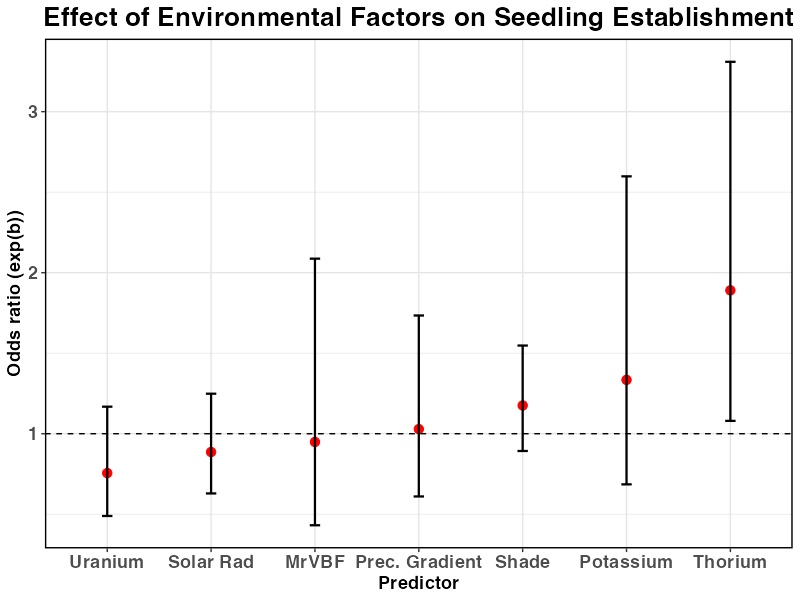

In [25]:
# generating exp() graphs 

# showing exponentiated values as a forest plot that is ordered for binomial data
tidy_env_bi_m <- broom::tidy(env_bi_m, conf.int = TRUE) #adding conf intervals 

# Build the table
exp_table_env_bi <- tidy_env_bi_m %>%
  filter(term != "(Intercept)") %>%
  filter(term != "sd__(Intercept)") %>% # remove intercept
  mutate(
    z.value = statistic,
    exp_estimate = exp(estimate),
    exp_conf.low = exp(conf.low), # adding confidence innterval error bars
    exp_conf.high = exp(conf.high),
    term = dplyr::recode(term, # renaming 
      "precip_PC1"   = "Prec. Gradient",
      "SRad_Jul_std"      = "Solar Rad",
      "MrVBF_std"  = "MrVBF",
      "K_perc_std"  = "Potassium", 
      "Th_ppm_std"  = "Thorium" ,
      "U_ppm_std"  = "Uranium", 
      "Euc_canopy_cover_std" = "Shade"

    )
)
  

# Forest plot
ggplot(exp_table_env_bi, aes(
    x = reorder(term, exp_estimate), # reordering based on the ordered exp_estimate numbers
    y = exp_estimate)
) +
  geom_point(size = 3, color = "red") +
  geom_errorbar(aes(ymin = exp_conf.low, ymax = exp_conf.high),
                width = 0.1, linewidth = 0.8) +
  geom_hline(yintercept = 1, linetype = "dashed") + # adding the line that denoted insignnificance (exp(0))
  labs(
    x = "Predictor",
    y = "Odds ratio (exp(b))",
    title = "Effect of Environmental Factors on Seedling Establishment"
  ) +
  theme(
    panel.background = element_rect(fill = "white"),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_line(color = "grey90"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1),
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 14, face = "bold"), 
    axis.title.y = element_text(size = 14, face = "bold"), 
    axis.text.x = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 14, face = "bold")) 

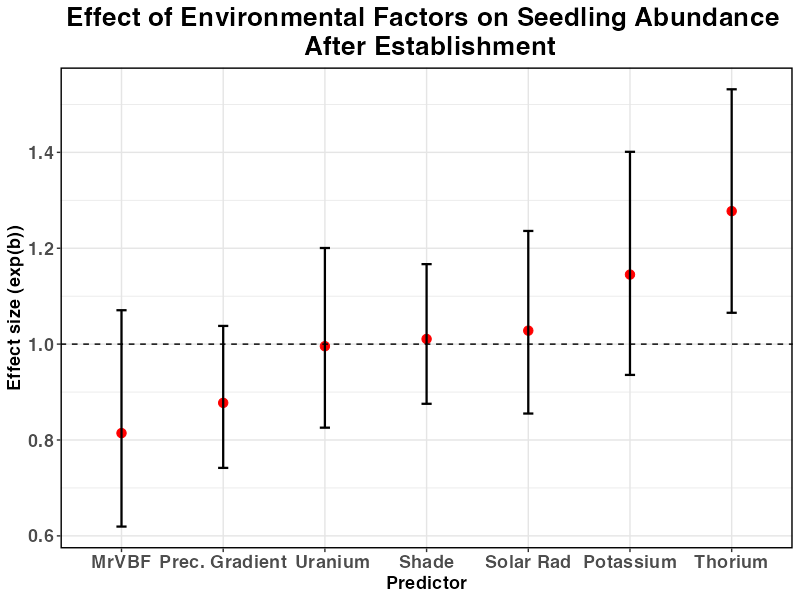

In [42]:
# generating exp() graphs 

# showing exponentiated values as a forest plot that is ordered for binomial data
tidy_env_nb_m <- broom::tidy(ab_nb_m, conf.int = TRUE) #adding conf intervals 

# Build the table
exp_table_env_nb <- tidy_env_nb_m %>%
  filter(term != "(Intercept)") %>%
  filter(term != "sd__(Intercept)") %>% # remove intercept
  mutate(
    z.value = statistic,
    exp_estimate = exp(estimate),
    exp_conf.low = exp(conf.low), # adding confidence innterval error bars
    exp_conf.high = exp(conf.high),
    term = dplyr::recode(term, # renaming 
      "precip_PC1"   = "Prec. Gradient",
      "SRad_Jul_std"      = "Solar Rad",
      "MrVBF_std"  = "MrVBF",
      "K_perc_std"  = "Potassium", 
      "Th_ppm_std"  = "Thorium" ,
      "U_ppm_std"  = "   Uranium", 
      "Euc_canopy_cover_std" = "Shade"

    )
)
  

# Forest plot
ggplot(exp_table_env_nb, aes(
    x = reorder(term, exp_estimate), # reordering based on the ordered exp_estimate numbers
    y = exp_estimate)
) +
  geom_point(size = 3, color = "red") +
  geom_errorbar(aes(ymin = exp_conf.low, ymax = exp_conf.high),
                width = 0.1, linewidth = 0.8) +
  geom_hline(yintercept = 1, linetype = "dashed") + # adding the line that denoted insignnificance (exp(0))
  labs(
    x = "Predictor",
    y = "Effect size (exp(b))",
    title = "Effect of Environmental Factors on Seedling Abundance \n After Establishment"
  ) +
  theme(
    panel.background = element_rect(fill = "white"),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_line(color = "grey90"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1),
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 14, face = "bold"), 
    axis.title.y = element_text(size = 14, face = "bold"), 
    axis.text.x = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 14, face = "bold")) 

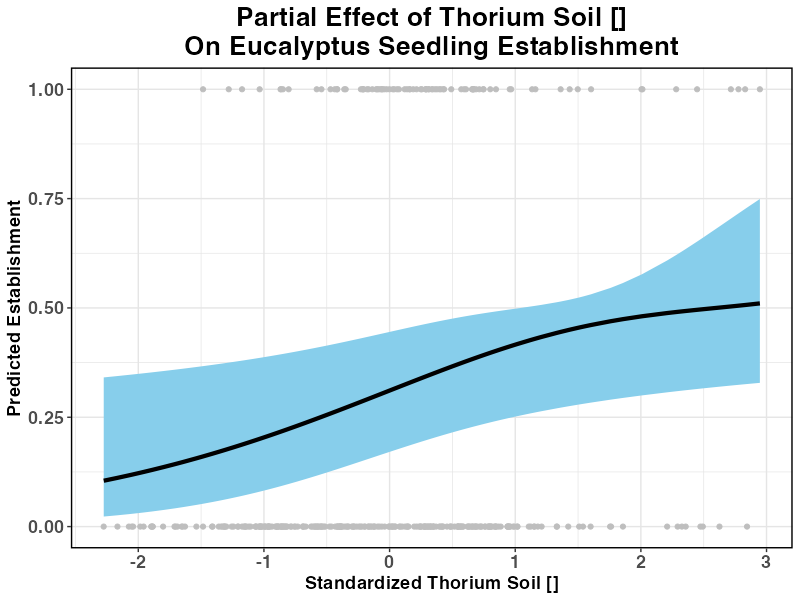

In [39]:
# partial effects of thorium

th_bi_predict = ggpredict(env_bi_m, terms = "Th_ppm_std [all]", bias_correction = TRUE) # for mixed models

bi_plot = ggplot(th_bi_predict, aes(x = x, y = predicted)) +
  geom_ribbon(aes(ymin = conf.low, ymax = conf.high), fill = "skyblue") +
  geom_line(color = "black", linewidth = 1.5) + # model prediction
  geom_point(data = dat_full, aes(x = Th_ppm_std, y = y1), color = "gray") + # adding raw data
  labs(
    x = "Standardized Thorium Soil []",
    y = "Predicted Establishment", 
    title = "Partial Effect of Thorium Soil []\nOn Eucalyptus Seedling Establishment"
  ) +
  scale_y_continuous(limits = c(0, 1)) + # bc my predicted values are 0 or 1
  theme(
    panel.background = element_rect(fill = "white"),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_line(color = "grey90"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1),
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 14, face = "bold"), 
    axis.title.y = element_text(size = 14, face = "bold"), 
    axis.text.x = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 14, face = "bold"))


bi_plot

Bias-correction is currently only supported for mixed or gee models. No bias-correction is applied.


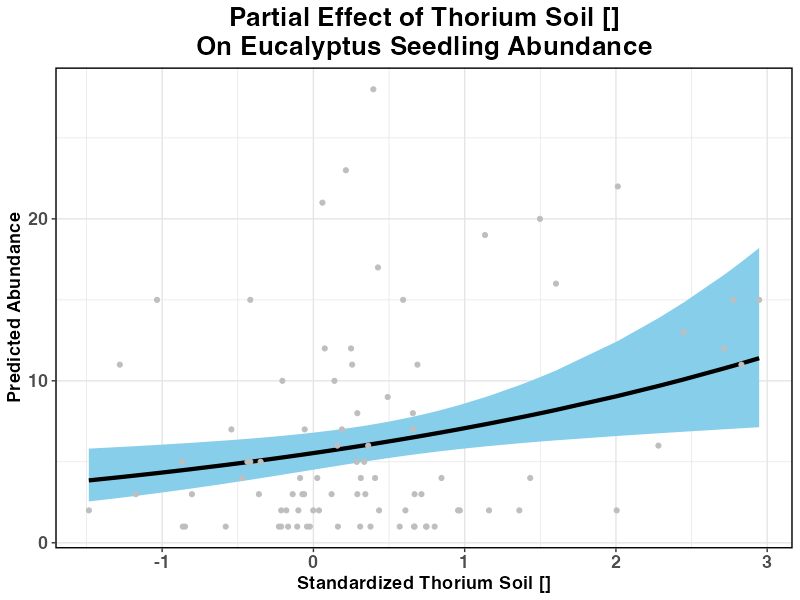

In [38]:
# partial effects of thorium

th_nb_predict = ggpredict(ab_nb_m, terms = "Th_ppm_std [all]", bias_correction = TRUE) # for mixed models

nb_plot = ggplot(th_nb_predict, aes(x = x, y = predicted)) +
  geom_ribbon(aes(ymin = conf.low, ymax = conf.high), fill = "skyblue") +
  geom_line(color = "black", linewidth = 1.5) + # model prediction
  geom_point(data = subset(dat_full, seedling_count>0), aes(x = Th_ppm_std, y = seedling_count), color = "gray") + # adding raw data
  labs(
    x = "Standardized Thorium Soil []",
    y = "Predicted Abundance", 
    title = "Partial Effect of Thorium Soil []\nOn Eucalyptus Seedling Abundance"
  ) +
  theme(
    panel.background = element_rect(fill = "white"),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_line(color = "grey90"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1),
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 14, face = "bold"), 
    axis.title.y = element_text(size = 14, face = "bold"), 
    axis.text.x = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 14, face = "bold"))


nb_plot

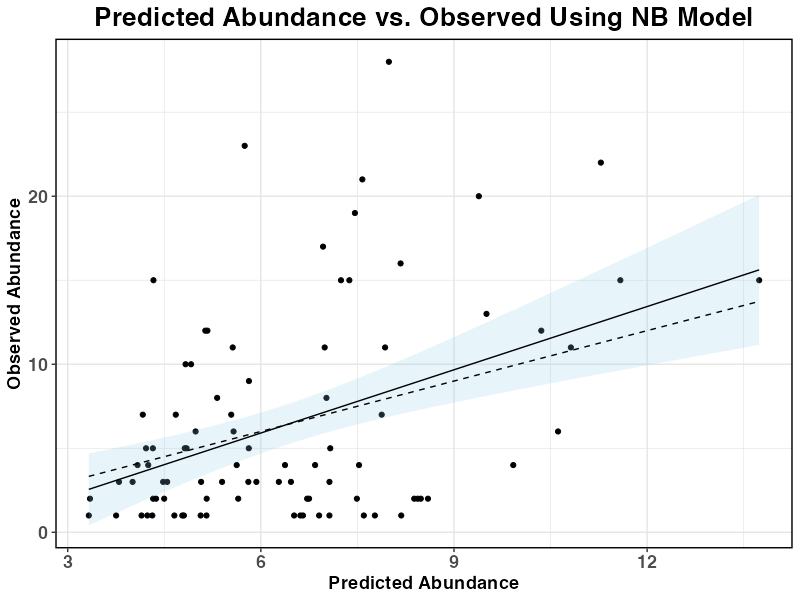

In [41]:
# all predicted values for entire model against observed

dat_pos = subset(dat_full, seedling_count > 0)

dat_pos$predicted_values = predict(ab_nb_m, type = "response", newdata = dat_pos)
dat_pos$observed <- dat_pos$seedling_count


# model fit line with a confidence interval shadding
fit_line <- lm(observed ~ predicted_values, data = dat_pos)
pred_fit_line <- data.frame(
  predicted_values = seq(min(dat_pos$predicted_values), max(dat_pos$predicted_values), length.out = 100)
)
pred_fit_line$fit <- predict(fit_line, newdata = pred_fit_line, interval = "confidence")[, "fit"]
pred_fit_line$lwr <- predict(fit_line, newdata = pred_fit_line, interval = "confidence")[, "lwr"]
pred_fit_line$upr <- predict(fit_line, newdata = pred_fit_line, interval = "confidence")[, "upr"]

# perfect prediction line 1:1
perfect_df <- data.frame(
  x = seq(min(dat_pos$predicted_values), max(dat_pos$predicted_values), length.out = 100),
  y = seq(min(dat_pos$predicted_values), max(dat_pos$predicted_values), length.out = 100),
  line_type = "Perfect predictions"
)

# plotting 
ggplot() +
  geom_point(
    data = dat_pos, 
    aes(x = predicted_values, y = observed)
  ) +
  geom_ribbon(
    data = pred_fit_line, 
    aes(x = predicted_values, ymin = lwr, ymax = upr),
    fill = "skyblue",
    alpha = 0.2, 
    inherit.aes = FALSE
  ) + 
  geom_line(
     data = pred_fit_line, 
     aes(x = predicted_values, y = fit), 
     color = "black"
  ) +
  geom_line(
    data = perfect_df, 
    aes(x = x, y = y), 
    linetype = "dashed"
  ) +
  labs(
    x = "Predicted Abundance",
    y = "Observed Abundance", 
    title = "Predicted Abundance vs. Observed Using NB Model",
  ) +
  theme(
    panel.background = element_rect(fill = "white"),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_line(color = "grey90"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1),
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 14, face = "bold"), 
    axis.title.y = element_text(size = 14, face = "bold"), 
    axis.text.x = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 14, face = "bold"))



In [ ]:
# outputting the summary tables 

refit_predictor_table = exp_table_env_bi %>%   
    #change the axis labels to be a bit clearer for the reader
  
    dplyr::select(-group) %>%
    dplyr::select(-conf.low) %>%
    dplyr::select(-conf.high) %>%
    dplyr::select(-exp_conf.low) %>%
    dplyr::select(-exp_conf.high) %>%
    dplyr::select(-effect) %>%
    dplyr::select(-component) %>%
    #open a gt table
    gt() %>%
    tab_header(title = "Binomial GLM for Predictors") %>%
    #change decimal output of the following
    fmt_number(
      columns = c(estimate, std.error, z.value, p.value, exp_estimate), 
      decimals = 3) %>%
    #make p value scientific 
    fmt_scientific(
      columns = c(p.value),
      decimals = 2) %>%
    cols_label(
      term = "",
      estimate = "Estimate",
      std.error = "SE",
      z.value = "z-value",
      p.value = "p-Value",
      exp_estimate = "Exp Estimate"
    )


gtsave(refit_predictor_table, "refit_predictor_table.png", zoom = 4)

file:////var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//RtmpjprON8/file9f23117c954.html screenshot completed


In [52]:


# outputting the summary tables 

refit_predictor_table_nb = exp_table_env_nb %>%   
    #change the axis labels to be a bit clearer for the reader
  
    dplyr::select(-conf.low) %>%
    dplyr::select(-conf.high) %>%
    dplyr::select(-exp_conf.low) %>%
    dplyr::select(-exp_conf.high) %>%
    dplyr::select(-effect) %>%
    dplyr::select(-component) %>%
    #open a gt table
    gt() %>%
    tab_header(title = "Negative Binomial GLM for Predictors") %>%
    #change decimal output of the following
    fmt_number(
      columns = c(estimate, std.error, z.value, p.value, exp_estimate), 
      decimals = 3) %>%
    #make p value scientific 
    fmt_scientific(
      columns = c(p.value),
      decimals = 2) %>%
    cols_label(
      term = "",
      estimate = "Estimate",
      std.error = "SE",
      z.value = "z-value",
      p.value = "p-Value",
      exp_estimate = "Exp Estimate"
    )


gtsave(refit_predictor_table_nb, "refit_predictor_table_nb.png", zoom = 4)

file:////var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//RtmpjprON8/file9f2264572e2.html screenshot completed
